In [1]:
import pandas as pd
import torch
import torchvision
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import wandb
import nltk
nltk.download('punkt')
wandb.login()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
wandb: Currently logged in as: rullofederico16 (fede-). Use `wandb login --relogin` to force relogin


In [2]:
vocab,embeddings = [],[]
with open('glove.6B.50d.txt','rt') as fi:
    full_content = fi.read().strip().split('\n')
for i in range(len(full_content)):
    i_word = full_content[i].split(' ')[0]
    i_embeddings = [float(val) for val in full_content[i].split(' ')[1:]]
    vocab.append(i_word)
    embeddings.append(i_embeddings)

import numpy as np
vocab = np.array(vocab)
embs = np.array(embeddings)

#insert '<pad>' and '<unk>' tokens at start of vocab_npa.
vocab = np.insert(vocab, 0, '<pad>')
vocab = np.insert(vocab, 1, '<unk>')
print(vocab[:10])

pad_emb = np.zeros((1,embs.shape[1]))   #embedding for '<pad>' token.
unk_emb = np.mean(embs,axis=0,keepdims=True)    #embedding for '<unk>' token.

#insert embeddings for pad and unk tokens at top of embs_npa.
embs = np.vstack((pad_emb,unk_emb,embs))
print(embs.shape)

['<pad>' '<unk>' 'the' ',' '.' 'of' 'to' 'and' 'in' 'a']
(400002, 50)


In [4]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

img_tr = [transform(Image.open(img)) for img in tqdm(data['image'])]

mean,std = img_tr[0].mean(),img_tr[0].std()

100%|██████████| 3000/3000 [00:35<00:00, 84.40it/s] 


In [5]:
mean,std = img_tr[0].mean([1,2]),img_tr[0].std([1,2])
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)

mean and std before normalize:
Mean of the image: tensor([0.4744, 0.4149, 0.3598])
Std of the image: tensor([0.1894, 0.1900, 0.1915])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([16, 3, 256, 256])
Labels batch shape: 16


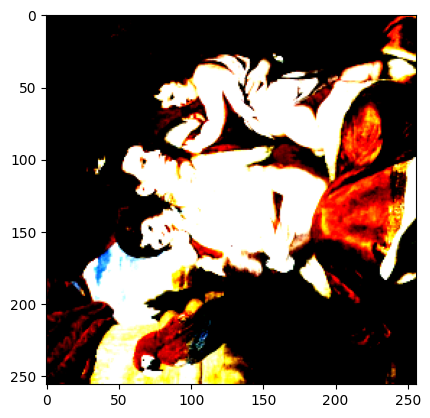

Label: tensor([[52467, 24710, 13059, 54537, 26436, 47701,  4114, 52204, 65532, 42344,
         39894, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529,
         48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529,
         48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529,
         48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529, 48529],
        [52165,  5341, 25797,  1654, 60694, 26214, 59000, 60694, 62745, 57739,
         60694, 10352, 31473, 34759, 44450, 26519, 60694, 22678, 20111, 39894,
         10352, 27405, 25797, 59000, 60694, 20111,  1654, 19398,    44, 57739,
         63079, 50640, 47701, 60694,  4888, 24657, 60602, 13059, 31184, 44076,
         60694, 28984, 47247, 59000, 60694, 60726, 39894, 52165,  3819, 35588],
        [32493,  3386, 35588, 32103, 44560,  1812, 47701, 58903, 52204, 29324,
         39894, 52165, 54026, 12656, 47701, 60694, 40415, 26092, 51059, 60694,
         55092, 24683, 47701, 32103,  7211,

In [9]:
batch_size = 16
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
features, labels = next(iter(trainloader))
print(f"Feature batch shape: {features.size()}")
print(f"Labels batch shape: {len(labels)}")
img = features[0].squeeze()
label = labels
plt.imshow(img.permute(*torch.arange(img.ndim - 1, -1, -1)))
plt.show()
print(f"Label: {label}")